## Importer, Visualiser et Preparer les données

In [2]:
# Importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401


In [3]:
# Import les données
df = pd.read_csv('Fuel_Consumption.csv')
#  Afficher les données
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [4]:
# Afficher les infos des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [5]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [6]:
df.groupby('CYLINDERS')

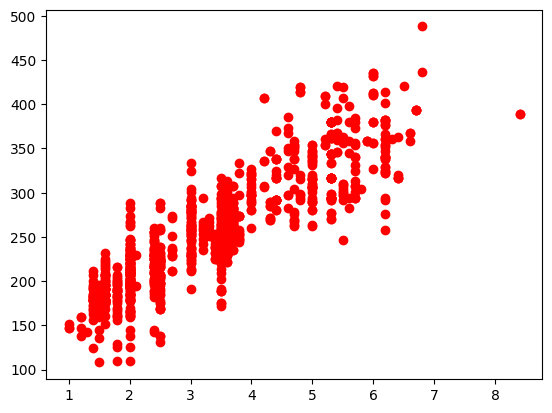

In [7]:
# Visualiser le scatter plot de l'emission de C02 (CO2EMISSION) en  fonction de la taille du moteur (ENGINESIZE)
plt.scatter(df.ENGINESIZE.values, df.CO2EMISSIONS.values, color = 'red')
plt.show()

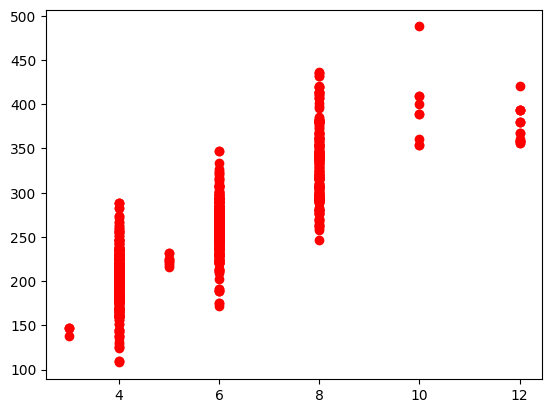

In [8]:
# Visualiser le scatter plot de l'emission de C02 (CO2EMISSION) en  fonction du nombre de cycindre (CYLINDERS)
plt.scatter(df.CYLINDERS.values, df.CO2EMISSIONS.values, color = 'red')
plt.show()

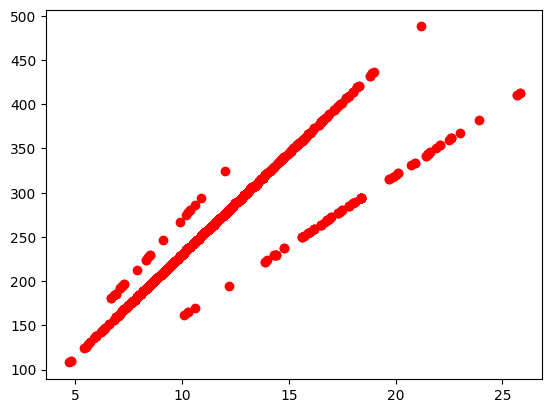

In [9]:
# Visualiser le scatter plot de l'emission de C02 (CO2EMISSION) en  fonction de la consommation de carburant (FUELCONSUMPTION_COMB)
plt.scatter(df.FUELCONSUMPTION_COMB.values, df.CO2EMISSIONS.values, color = 'red')
plt.show()

In [10]:
# Fractionner les données
X = df.drop('CO2EMISSIONS', axis = 1).values
y = df.CO2EMISSIONS.values

In [11]:
# from sklearn.preprocessing import StandardScaler
# Normaliser X
# X = StandardScaler().fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
# Splitter les données en train et test
x_train, x_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)
# Splitter les données en val et test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

In [13]:
# Afficher les dimensions
print("Dimension des données train:  ", x_train.shape, y_train.shape)
print("Dimension des données validation:  ", x_val.shape, y_val.shape)
print("Dimension des données test:  ", x_test.shape, y_test.shape)


Dimension des données train:   (853, 3) (853,)
Dimension des données validation:   (107, 3) (107,)
Dimension des données test:   (107, 3) (107,)


## Modélisation

#### Linear regression

In [14]:
# Importer Linear Regression
from sklearn.linear_model import LinearRegression
# Initilisation du modèle
lr = LinearRegression()
# Entrainement du modèle
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
# Calculer le R2 score et Mean Squarred Error
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lr.predict(x_val)
a = 'R2 score : ', r2_score(y_pred, y_val),'-----', ' Mean squared error : ', mean_squared_error(y_pred, y_val)
a

('R2 score : ',
 0.8454049713860015,
 '-----',
 ' Mean squared error : ',
 589.7942470139338)

#### Ridge regression

In [16]:
# Importer GridSearchCV, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
# Recherche l'alpha optimal
params = {
    'alpha':np.logspace(-8,8, 100)
}
rr = Ridge()
grid_rr = GridSearchCV(rr, params, cv = 5)
grid_rr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [17]:
# Print du best paramètre
grid_rr.best_params_

{'alpha': 16.297508346206467}

In [18]:
# Initialisation du modèle avec l'alpha optimal
Rid_r  = Ridge(alpha = 7.742636826811277)
# Entrainer le modèle
Rid_r.fit(x_train, y_train)

Ridge(alpha=7.742636826811277)

In [19]:
# Calculer le R2 score et Mean Squarred Error
y_pred = Rid_r.predict(x_val)
b = 'R2 score : ', r2_score(y_pred, y_val),'-----', ' Mean squared error : ', mean_squared_error(y_pred, y_val)

#### Lasso Regression

In [20]:
#  Importer lasso
from sklearn.linear_model import Lasso
# Recherche l'alpha optimal
params = {
    'alpha':np.logspace(-8,8, 100)
}
lar = Lasso()
grid_lar = GridSearchCV(lar, params, cv = 5)
grid_lar.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [21]:
# Afficher l'alpha optimal
grid_lar.best_params_

{'alpha': 0.061359072734131756}

In [22]:
# Initialiser le modèle
Lar = Lasso(alpha  = 0.12915496650148853)
#Entrainer le modèle
Lar.fit(x_train, y_train)

Lasso(alpha=0.12915496650148853)

In [23]:
# Calculer le R2 score et Mean Squarred Error
y_pred = Lar.predict(x_val)
c = 'R2 score : ', r2_score(y_pred, y_val),'-----', ' Mean squared error : ', mean_squared_error(y_pred, y_val)

In [24]:
a,b,c

(('R2 score : ',
  0.8454049713860015,
  '-----',
  ' Mean squared error : ',
  589.7942470139338),
 ('R2 score : ',
  0.8451625515737065,
  '-----',
  ' Mean squared error : ',
  589.8719328912816),
 ('R2 score : ',
  0.8450591426686581,
  '-----',
  ' Mean squared error : ',
  590.0872318720019))

Le Lineare est le modèle le plus performant

#### Prédictions en utilisant le Linear model

In [25]:
# Prédictions
x_test_3 = x_test[:3]
# Prédire les espérances de vie des trois zones
y_pred_3 = lr.predict(x_test_3)
# Afficher les prédictions
for i in range(0, 3):
  print('La voiture ',str(i), '(', x_test[i], ')', ' a  une emission de C02 ', np.round( y_pred_3[i], 2), '---', y_test[i])

La voiture  0 ( [ 3.6  6.  16.5] )  a  une emission de C02  307.73 --- 264
La voiture  1 ( [2.  4.  8.3] )  a  une emission de C02  197.41 --- 191
La voiture  2 ( [1.4 4.  7.8] )  a  une emission de C02  185.93 --- 179


In [26]:
import pickle

In [27]:
# Enregistrer notre model Linear
# filename_linear_model = 'model.sav'
# pickle.dump(lr, open(filename_linear_model, 'wb'))
# # Enregistrer notre model Lasso
# filename_lasso_model = 'model_lasso.sav'
# pickle.dump(lr, open(filename_lasso_model, 'wb'))
# # Enregistrer notre model Ridge
# filename_ridge_model = 'model_ridge.sav'
# pickle.dump(lr, open(filename_ridge_model, 'wb'))

In [28]:
data = {"model": lr, "x_test": x_test, "y_test": y_test}
with open('model_test_data.pkl', 'wb') as file:
    pickle.dump(data, file)